# Lista de Exercício 01 - Modelagem e Simulação

> Guilherme Alves Carvalho - 11921BCC016

initialize + utils

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def experimentMeans(experiment, qnt = 5):
    results = []
    for i in range(qnt):
        results.append(experiment())
    return np.mean(results)

## Exercício 1

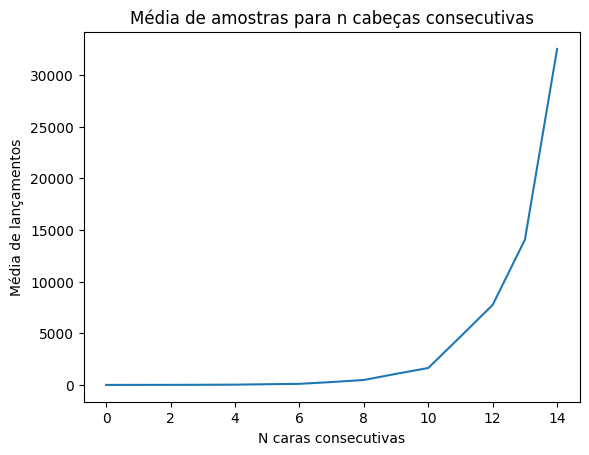

In [4]:
def nFollowingHeads(n):
    consecutiveNs = 0

    samplesDone = 0
    while consecutiveNs != n:
      sample = np.random.choice(['H', 'T'])

      if sample == 'H':
        consecutiveNs += 1
      else:
        consecutiveNs = 0
      samplesDone += 1
        
    return samplesDone
  
n = 15
results = []

for i in range(n):
   results.append(
      experimentMeans(lambda: nFollowingHeads(i), 50)
   )

plt.axes().set(xlabel='N caras consecutivas', ylabel='Média de lançamentos', title='Média de amostras para n cabeças consecutivas')
plt.plot(results)

## Exercício 2

### Letra A

In [7]:
def experiment():
  samples = []
  for j in range(1000):
    comum = np.random.choice(range(1, 21))
    vantagem = np.random.choice(range(1, 21), 2).max()
    samples.append(comum < vantagem)
  return np.mean(samples)
  
print(experimentMeans(experiment, 100))
# a vantagem é melhor em média 14% que a normal

0.6418200000000001


### Letra B e C

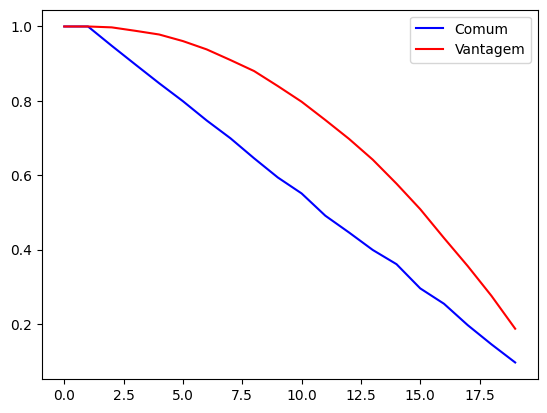

Conforme D aumenta, a importância da vantagem aumenta
e é melhor pois permite um relançamento, o
que aumenta a chance de se obter um número maior.


In [11]:
porcentagensComum = []
porcentagensVantagem = []

for i in range(20):
  samplesComum = []
  samplesVantagem = []

  for j in range(10000):
    comum = np.random.choice(range(1, 21))
    vantagem = np.random.choice(range(1, 21), 2).max()

    samplesComum.append(comum >= i)
    samplesVantagem.append(vantagem >= i)

  porcentagensComum.append(np.mean(samplesComum))
  porcentagensVantagem.append(np.mean(samplesVantagem))

plt.plot(porcentagensComum, label='Comum', color='blue')
plt.plot(porcentagensVantagem, label='Vantagem', color='red')
plt.legend()
plt.show()

# c
print('Conforme D aumenta, a importância da vantagem aumenta\ne é melhor pois permite um relançamento, o\nque aumenta a chance de se obter um número maior.')

## Exercício 3

In [12]:
def experiment(n):
  throws = 1
  sample = np.random.choice(['H', 'T'], n)

  while len(sample) != 0:

    tailsCount = np.count_nonzero(sample == 'T')
    sample = np.random.choice(['H', 'T'], tailsCount)

    throws += 1


  return throws

results = []

for i in range(1, 7000):
  results.append(experimentMeans(lambda: experiment(i)))

print(np.mean(results))

13.66789541363052


## Exercício 4

In [8]:
def geraFilhos():
    choices = ['H', 'M']
    a = np.random.choice(choices)
    b = np.random.choice(choices)

    return a, b

resultados = []

for _ in range(10000):
    a, b = geraFilhos()

    resultados.append([a, b])

totalComPeloMenosUmH = ['H' in val for val in resultados].count(True)
totalComAmbosH = [val == ['H', 'H'] for val in resultados].count(True)

print(totalComAmbosH / totalComPeloMenosUmH)

0.336309127248501


## Exercício 5

### Letra A

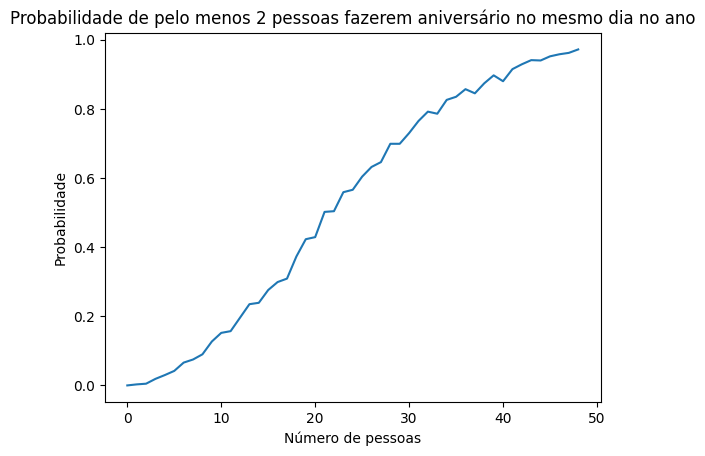

In [12]:
def experiment(n, size = 2):
    nivers = np.array([0 for _ in range(0, 365)])
    
    for _ in range(n):
        nivers[np.random.randint(365)] += 1
    
    return np.count_nonzero(nivers >= size) > 0

results = []
for i in range(1, 50):
    value = experimentMeans(lambda: experiment(i), 1000)
    results.append(value)

plt.axes().set(
    xlabel='Número de pessoas', 
    ylabel='Probabilidade', 
    title='Probabilidade de pelo menos 2 pessoas fazerem aniversário no mesmo dia no ano'
)

plt.plot(
    results
)

### Letra B

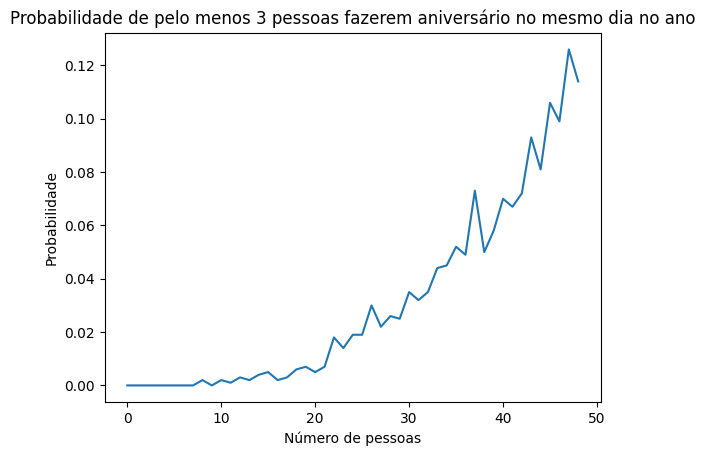

In [13]:
results = []
for i in range(1, 50):
    results.append(experimentMeans(lambda: experiment(i, 3), 1000))

plt.axes().set(
    xlabel='Número de pessoas', 
    ylabel='Probabilidade', 
    title='Probabilidade de pelo menos 3 pessoas fazerem aniversário no mesmo dia no ano'
)

plt.plot(results)

## Exercício 6

### Letra A

(array([  3.,  16.,  76., 143., 240., 227., 168.,  89.,  30.,   8.]),
 array([22.37 , 23.617, 24.864, 26.111, 27.358, 28.605, 29.852, 31.099,
        32.346, 33.593, 34.84 ]),
 <BarContainer object of 10 artists>)

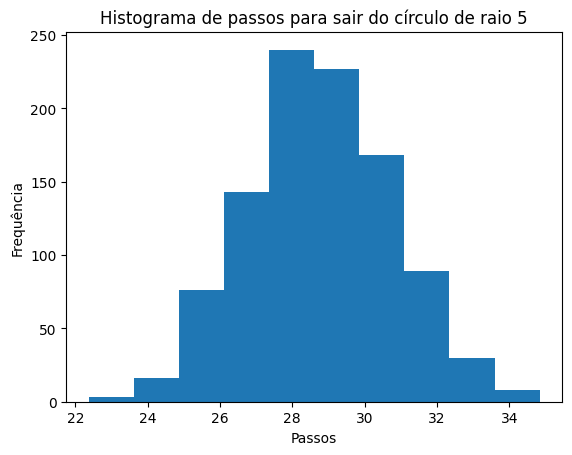

In [15]:
def experiment():
    coordBebado = [0, 0]
    passos = 0
    while np.linalg.norm(coordBebado) <= 5:
      x = np.random.random() * 2 - 1
      y = np.sqrt(1 - x**2)
      y = np.random.choice([y, -y])

      deslocamento = [x, y]
      coordBebado[0] += deslocamento[0]
      coordBebado[1] += deslocamento[1]

      passos += 1

    return passos

results = []
for _ in range(1000):   
  results.append(experimentMeans(experiment, 100))

plt.axes().set(
  xlabel='Passos', 
  ylabel='Frequência', 
  title='Histograma de passos para sair do círculo de raio 5'
)

plt.hist(results)

### Letra B

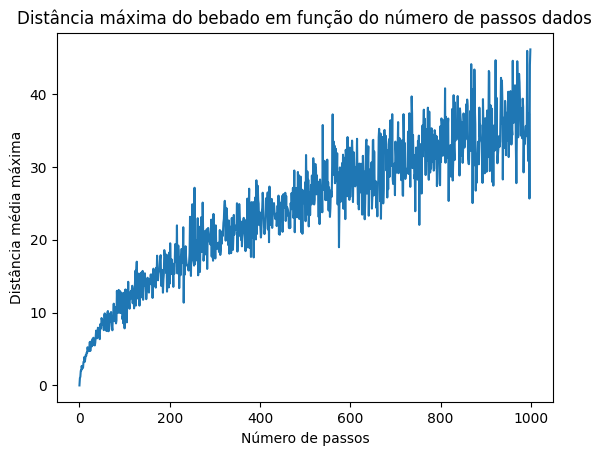

In [16]:
def experiment(maxSteps = 100):
    coordBebado = [0, 0]

    distance = 0
    for _ in range(maxSteps):
      x = np.random.random() * 2 - 1
      y = np.sqrt(1 - x**2)
      y = np.random.choice([y, -y])

      deslocamento = [x, y]
      coordBebado[0] += deslocamento[0]
      coordBebado[1] += deslocamento[1]

      distance = np.max([distance, np.linalg.norm(coordBebado)])

    return distance

results = []
for i in range(1000):   
  results.append(experimentMeans(lambda: experiment(i), 10))


plt.axes().set(
  xlabel='Número de passos', 
  ylabel='Distância média máxima', 
  title='Distância máxima do bebado em função do número de passos dados'
)

plt.plot(results)

## Exercício 7

### Letra A

In [17]:
# 0 BR
# 1 FG
# 2 SURINAME
# 3 GUYANA
# 4 VENEZUELA
# 5 COLOMBIA
# 6 ECUADOR
# 7 PERU
# 8 BOLIVIA
# 9 PARAGUAY
# 10 CHILE
# 11 ARGENTINA
# 12 URUGUAY

matrizAdjacencia = [
    [0.00,0.10,0.10,0.10,0.10,0.10,0.00,0.10,0.10,0.10,0.00,0.10,0.10],
    [0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [1/3,1/3,0.00,1/3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [1/3,0.00,1/3,0.00,1/3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [1/3,0.00,0.00,1/3,0.00,1/3,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
    [0.25,0.00,0.00,0.00,0.25,0.00,0.25,0.25,0.00,0.00,0.00,0.00,0.00],
    [0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.50,0.00,0.00,0.00,0.00,0.00],
    [0.20,0.00,0.00,0.00,0.00,0.20,0.20,0.00,0.20,0.00,0.20,0.00,0.00],
    [0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.20,0.20,0.20,0.00],
    [1/3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1/3,0.00,0.00,1/3,0.00],
    [0.00,0.00,0.00,0.00,0.00,0.00,0.00,1/3,1/3,0.00,0.00,1/3,0.00],
    [0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.20,0.20,0.00,0.20],
    [0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00],
]

def caminhadaAleatoria(steps = 100, ini = np.random.randint(0, 13)):
    posPais = ini

    for _ in range(steps):
        posPais = np.random.choice(13, p = matrizAdjacencia[posPais])

    estaNoBrasil = posPais == 0
    return estaNoBrasil



    

print(experimentMeans(caminhadaAleatoria, 10000))

0.1991


### Letra B

In [25]:
def experiment():
    steps = 0
    visited = [False for _ in range(13)]
    posPais = np.random.randint(0, 13)
    visited[posPais] = True

    while not np.all(visited):
        posPais = np.random.choice(range(13), p = matrizAdjacencia[posPais])

        visited[posPais] = True
        steps += 1
    
    return steps

experimentMeans(experiment, 5000)

66.1008

### Letra C

In [26]:
  
matrizEquilibrio2 = experimentMeans(lambda: caminhadaAleatoria(2, ini = 0), 100000)
matrizEquilibrio3 = experimentMeans(lambda: caminhadaAleatoria(3, ini = 0), 100000)
matrizEquilibrio4 = experimentMeans(lambda: caminhadaAleatoria(4, ini = 0), 100000)

print("Probabilidade de estar no brasil após 2 passos: ", matrizEquilibrio2)
print("Probabilidade de estar no brasil após 3 passos: ", matrizEquilibrio3)
print("Probabilidade de estar no brasil após 4 passos: ", matrizEquilibrio4)

Probabilidade de estar no brasil após 2 passos:  0.3201
Probabilidade de estar no brasil após 3 passos:  0.16688
Probabilidade de estar no brasil após 4 passos:  0.22779


### Letra D

In [27]:
def caminhadaAleatoriaD():
    posPais = 0

    for _ in range(10):
        posPais = np.random.choice(13, p = matrizAdjacencia[posPais])

    naoEstaNoChile = posPais != 10
    return naoEstaNoChile

print(experimentMeans(caminhadaAleatoriaD, 10000))


0.9422


## Exercício 8

### Letra A

<BarContainer object of 40 artists>

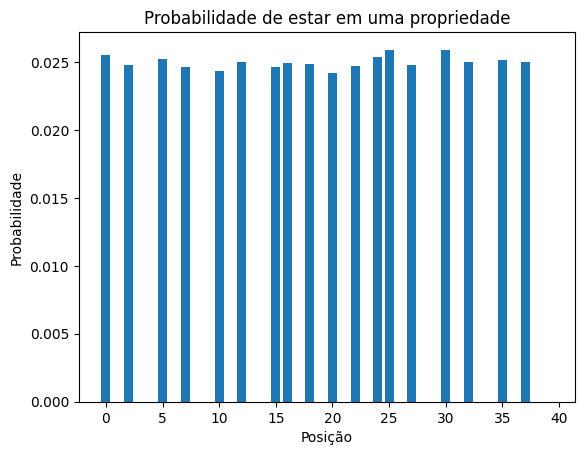

In [18]:
isProperty = [
    0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
    0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
    0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
    0, 1, 0, 1, 1, 0, 1, 0, 1, 1
]
timesVisited = [0 for _ in range(np.shape(isProperty)[0])]
pos = 0
timesVisited[pos] += 1

for _ in range(100000):

    resultadoDados = np.random.randint(0, 7) + np.random.randint(0, 7)
    pos += resultadoDados
    pos %= np.shape(isProperty)[0]
    timesVisited[pos] += 1

timesVisited = timesVisited / np.sum(timesVisited)


for i in range(np.shape(isProperty)[0]):
    if isProperty[i]:
        timesVisited[i] = 0

    
plt.axes().set(
    xlabel='Posição',
    ylabel='Probabilidade',
    title='Probabilidade de estar em uma propriedade'
)

plt.bar(range(np.shape(isProperty)[0]), timesVisited)

### Letra B

<BarContainer object of 40 artists>

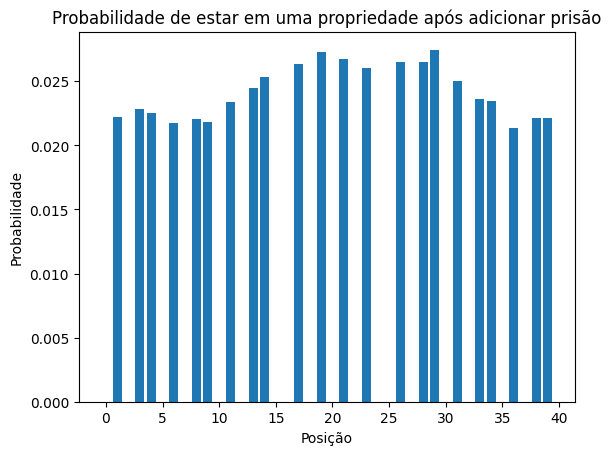

In [19]:
timesVisited = [0 for _ in range(np.shape(isProperty)[0])]
pos = 0
timesVisited[pos] += 1

for _ in range(100000):

    resultadoDados = np.random.randint(0, 7) + np.random.randint(0, 7)
    pos += resultadoDados
    pos %= np.shape(isProperty)[0]
    timesVisited[pos] += 1

    if pos == 30:
      pos = 10
      timesVisited[pos] += 1

timesVisited = timesVisited / np.sum(timesVisited)


for i in range(np.shape(isProperty)[0]):
    if isProperty[i] == 0:
        timesVisited[i] = 0


plt.axes().set(
    xlabel='Posição',
    ylabel='Probabilidade',
    title='Probabilidade de estar em uma propriedade após adicionar prisão'
)
plt.bar(range(np.shape(isProperty)[0]), timesVisited)

### Letra C

In [20]:
timesVisited = np.array(timesVisited)

cores = {
  'roxo claro': np.mean(np.take(timesVisited, [1, 3, 4])),
  'azul claro': np.mean(np.take(timesVisited, [6, 8, 9])),
  'roxo escuro': np.mean(np.take(timesVisited, [11, 13, 14])),
  'laranja': np.mean(np.take(timesVisited, [17, 19])),
  'vermelho': np.mean(np.take(timesVisited, [21, 23])),
  'amarelo': np.mean(np.take(timesVisited, [26, 28, 29])),
  'verde': np.mean(np.take(timesVisited, [31, 33, 34, 36])),
  'azul': np.mean(np.take(timesVisited, [38, 39]))
}

print(cores)
print("A melhor cor é:", max(cores, key=cores.get))

{'roxo claro': 0.022524496201019772, 'azul claro': 0.021872129668396575, 'roxo escuro': 0.024393964473611612, 'laranja': 0.026800580314109618, 'vermelho': 0.026411107757319648, 'amarelo': 0.026815185534989242, 'verde': 0.02337078761087797, 'azul': 0.022131778039589885}
A melhor cor é: amarelo


## Exercício 9

### Letra A